In [6]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

%load_ext autoreload
%autoreload 2
import src

/home/claas/gdeltsocialvideo/lib/python3.5/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
conn = psycopg2.connect(database="gdelt_social_video", user="postgres")

# Articles

In [3]:
articles = pd.read_sql_query('SELECT mention_identifier, confidence, in_raw_text, mention_doc_len, mention_doc_tone FROM mentions',con=conn)
articles.head()

,mention_identifier,confidence,in_raw_text,mention_doc_len,mention_doc_tone
0,https://timesofindia.indiatimes.com/world/midd...,60.0,True,7012,-1.457976
1,https://timesofindia.indiatimes.com/world/midd...,20.0,False,7012,-1.457976
2,https://timesofindia.indiatimes.com/world/midd...,20.0,False,7012,-1.457976
3,https://timesofindia.indiatimes.com/world/midd...,60.0,True,7012,-1.457976
4,http://www.timescall.com/top-stories/ci_319915...,20.0,False,3231,-1.069519


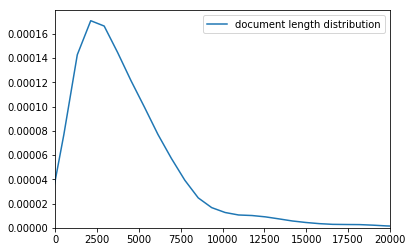

In [15]:
g = sns.kdeplot(data=articles["mention_doc_len"].sample(10000),label="document length distribution")
g.set(xlim=(0, 20000))
plt.savefig(os.environ['FIGURES_PATH'] + "document_length_distribution_gdelt.pdf", format="pdf")

In [16]:
articles["mention_doc_len"].describe()

count    1.751609e+07
mean     4.525019e+03
std      4.722393e+03
min      2.200000e+01
25%      2.081000e+03
50%      3.488000e+03
75%      5.551000e+03
max      4.625960e+05
Name: mention_doc_len, dtype: float64

## InRawText

In [17]:
articles["in_raw_text"].describe()

count     17516090
unique           2
top          False
freq       9265800
Name: in_raw_text, dtype: object

## Confidence

In [18]:
articles["confidence"].describe()

count    1.751609e+07
mean     4.463158e+01
std      3.065017e+01
min      1.000000e+01
25%      2.000000e+01
50%      4.000000e+01
75%      6.000000e+01
max      1.000000e+02
Name: confidence, dtype: float64

## Tone

In [19]:
articles["mention_doc_tone"].describe()

count    1.751609e+07
mean    -2.593648e+00
std      3.728031e+00
min     -4.444444e+01
25%     -4.895105e+00
50%     -2.407002e+00
75%     -1.552795e-01
max      3.333333e+01
Name: mention_doc_tone, dtype: float64

# Events

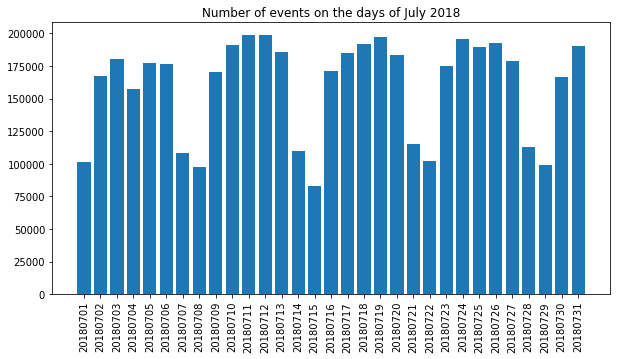

In [69]:
# events = pd.read_sql_query('SELECT sql_date, count(1) FROM events WHERE month_year=201807 GROUP BY sql_date',con=conn)
# SELECT sql_date, count(1) FROM events WHERE month_year=201807 GROUP BY sql_date
data = [(20180727,179051), (20180722,102110), (20180712,198393), (20180711,198447), (20180723,174559), (20180728,112743), (20180720,183643), (20180702,167548), (20180707,108042), (20180716,171321), (20180724,195769), (20180704,157132), (20180706,176242), (20180726,192363), (20180705,177237), (20180725,189504), (20180715,82979), (20180729,99095), (20180709,169962), (20180708,97453), (20180719,196866), (20180731,190156), (20180718,191409), (20180710,190680), (20180714,109710), (20180713,185928), (20180703,180454), (20180721,114837), (20180717,184970), (20180701,101185), (20180730,166415)]
data.sort(key=lambda x: x[0])
days, counts = zip(*data)
f, ax = plt.subplots(figsize=(10, 5))
ax.bar([str(day) for day in days], counts)
ax.set_title("Number of events on the days of July 2018")
ticks = plt.xticks(rotation='vertical')
plt.savefig(os.environ['FIGURES_PATH'] + "sql_date_bar.pdf", format="pdf")

In [72]:
np.mean(counts), np.std(counts), np.sum(counts)

(159554.93548387097, 37652.131073591765, 4946203)

## NumMentions

In [ ]:
# Same for NumSources, NumArticles
# select min(num_mentions), max(num_mentions), avg(num_mentions), stddev(num_mentions) from events

## event_code_pie

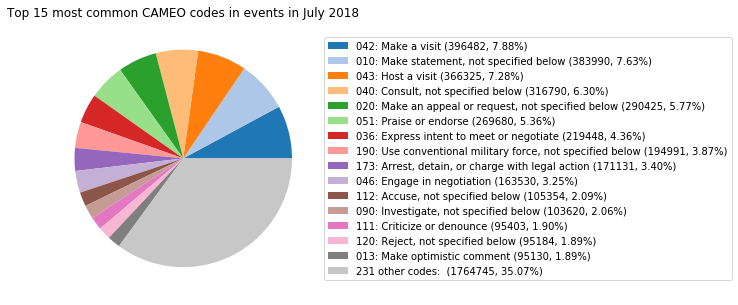

In [7]:

#data = [("181",8701),("1122",386),("0861",223),("1623",22),("083",2415),("113",1381),("034",182),("131",1509),("1043",1699),("063",1887),("056",1210),("1013",135),("1831",1722),("0256",782),("196",276),("1222",5),("1382",21),("0331",3553),("024",170),("107",33),("0252",2),("1044",750),("0834",95),("071",75284),("060",70545),("161",5589),("1823",1530),("1724",744),("0811",124),("074",974),("175",2923),("0812",7),("032",4329),("0873",811),("0214",5010),("061",42379),("114",26847),("145",3360),("201",35),("1821",10262),("0341",125),("---",1),("055",6195),("1211",19),("1411",151),("150",4681),("185",393),("091",1817),("180",34517),("186",5806),("0213",988),("0233",3031),("1124",4054),("1034",3),("053",1827),("1722",645),("0312",423),("1051",2),("160",24355),("086",475),("140",3963),("1241",1545),("0211",911),("1033",4),("191",3239),("0353",4331),("1383",852),("1622",3),("037",1977),("1123",4226),("1233",453),("0253",1223),("0872",93),("203",1138),("084",47618),("039",489),("1313",491),("080",58559),("1053",1981),("1213",10),("1125",247),("151",769),("010",383990),("0831",10991),("202",833),("0332",1882),("0255",15),("094",136),("072",9947),("0334",446),("1723",1671),("0355",15),("1712",10900),("052",5512),("1832",247),("144",1115),("0351",108),("042",396482),("092",209),("1232",8),("139",2411),("1311",12),("1721",3439),("018",8461),("044",6663),("085",1767),("1031",130),("013",95130),("1822",3523),("1414",7),("015",22548),("016",16558),("110",88034),("1231",65),("020",290425),("041",7051),("127",1150),("027",1945),("132",31),("170",3075),("1621",69),("033",10277),("062",7783),("0814",3),("152",949),("164",4880),("182",9808),("0313",3),("0231",5129),("193",72934),("046",163530),("129",3569),("184",16),("116",78),("128",9886),("1431",9),("0862",860),("172",45266),("082",800),("174",10334),("101",1045),("1385",3),("0234",1522),("1244",329),("057",62062),("043",366325),("022",6653),("153",1611),("036",219448),("143",2925),("011",12247),("1312",1214),("124",3878),("1661",9),("014",41644),("028",1244),("0232",190),("1413",3),("105",209),("0833",2722),("121",219),("142",996),("194",5450),("1243",1431),("136",73),("173",171131),("031",14286),("051",269680),("021",939),("162",1140),("0333",863),("163",9302),("1056",779),("0251",10),("195",5815),("081",12662),("0841",25528),("166",1267),("1412",77),("190",194991),("0244",20),("0863",31),("125",8683),("038",105),("012",83503),("1121",1837),("112",105354),("026",17879),("017",26159),("0311",9899),("0314",43),("0242",49),("1014",3296),("0871",2833),("111",95403),("0874",20516),("183",1704),("1662",27),("134",975),("030",83703),("064",2078),("025",6781),("054",2673),("154",6844),("073",27860),("1246",402),("1384",1119),("093",294),("192",23631),("1042",7),("090",103620),("130",54988),("023",7440),("133",1451),("141",32779),("1054",91),("115",5812),("120",95184),("1041",813),("1234",7),("0344",52),("0241",2167),("087",448),("045",8062),("075",5520),("102",116),("0243",205),("0356",2435),("0813",11),("137",180),("123",134),("0254",62),("070",55680),("040",316790),("122",1155),("1322",10),("035",4656),("100",54337),("0842",1195),("106",356),("138",12754),("0212",25),("019",821),("171",2919),("050",57415),("1711",2251)]
#data = sorted(data, key=lambda x: -x[1])
#data = data[:15] + [("231 other codes", sum(map(lambda x: x[1], data[15:])))]
data = [('042', 396482), ('010', 383990), ('043', 366325), ('040', 316790), 
        ('020', 290425), ('051', 269680), ('036', 219448), ('190', 194991), 
        ('173', 171131), ('046', 163530), ('112', 105354), ('090', 103620), 
        ('111', 95403), ('120', 95184), ('013', 95130), ('231 other codes', 1764745)]
labels, counts = zip(*data)
names = ["Make a visit", "Make statement, not specified below", "Host a visit", "Consult, not specified below",
        "Make an appeal or request, not specified below", "Praise or endorse", "Express intent to meet or negotiate", "Use conventional military force, not specified below",
        "Arrest, detain, or charge with legal action", "Engage in negotiation", "Accuse, not specified below", "Investigate, not specified below",
        "Criticize or denounce", "Reject, not specified below", "Make optimistic comment", ""]

labels = ["%s: %s (%d, %.2f%%)" % (label, name, count, 100*count/sum(counts)) 
          for label, name, count in zip(labels, names, counts)]

f, ax = plt.subplots(figsize=(10, 5))
patches, _ = ax.pie(counts, colors=plt.cm.tab20.colors)
lgd = ax.legend(patches,
                labels,
                bbox_to_anchor=(1,0.5), 
                loc="center left")

ax.set_title("Top 15 most common CAMEO codes in events in July 2018")
plt.savefig(os.environ['FIGURES_PATH'] + "event_code_pie.pdf", format="pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [113]:
labels

('042',
 '010',
 '043',
 '040',
 '020',
 '051',
 '036',
 '190',
 '173',
 '046',
 '112',
 '090',
 '111',
 '120',
 '013',
 '231 other codes')